# Credit Card Fraud Detection
    

### Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the data set

In [3]:
dataset = pd.read_csv("C:\\datasets\\creditcard_2023.csv")

In [4]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Getting familiar with the data set using the in built .info() function

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
dataset['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [9]:
dataset.shape

(568630, 31)

### Creating a Correlation Matrix
##### This will help us in identifying the features which have the highest correlation with the target

In [76]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

              id        V1        V2        V3        V4        V5        V6  \
id      1.000000 -0.395741  0.424267 -0.663655  0.617554 -0.268445 -0.387916   
V1     -0.395741  1.000000 -0.561184  0.484499 -0.498963  0.517462  0.354728   
V2      0.424267 -0.561184  1.000000 -0.627810  0.579638 -0.631669 -0.341040   
V3     -0.663655  0.484499 -0.627810  1.000000 -0.687726  0.510351  0.508974   
V4      0.617554 -0.498963  0.579638 -0.687726  1.000000 -0.429243 -0.474403   
V5     -0.268445  0.517462 -0.631669  0.510351 -0.429243  1.000000  0.245187   
V6     -0.387916  0.354728 -0.341040  0.508974 -0.474403  0.245187  1.000000   
V7     -0.414288  0.573381 -0.694022  0.634336 -0.588648  0.586828  0.418703   
V8      0.121282 -0.226757  0.191321 -0.263018  0.199013 -0.314975 -0.604491   
V9     -0.508427  0.548973 -0.585095  0.648615 -0.676648  0.479614  0.432241   
V10    -0.578014  0.599108 -0.621798  0.707676 -0.712839  0.563874  0.471000   
V11     0.589321 -0.525797  0.558863 -0.

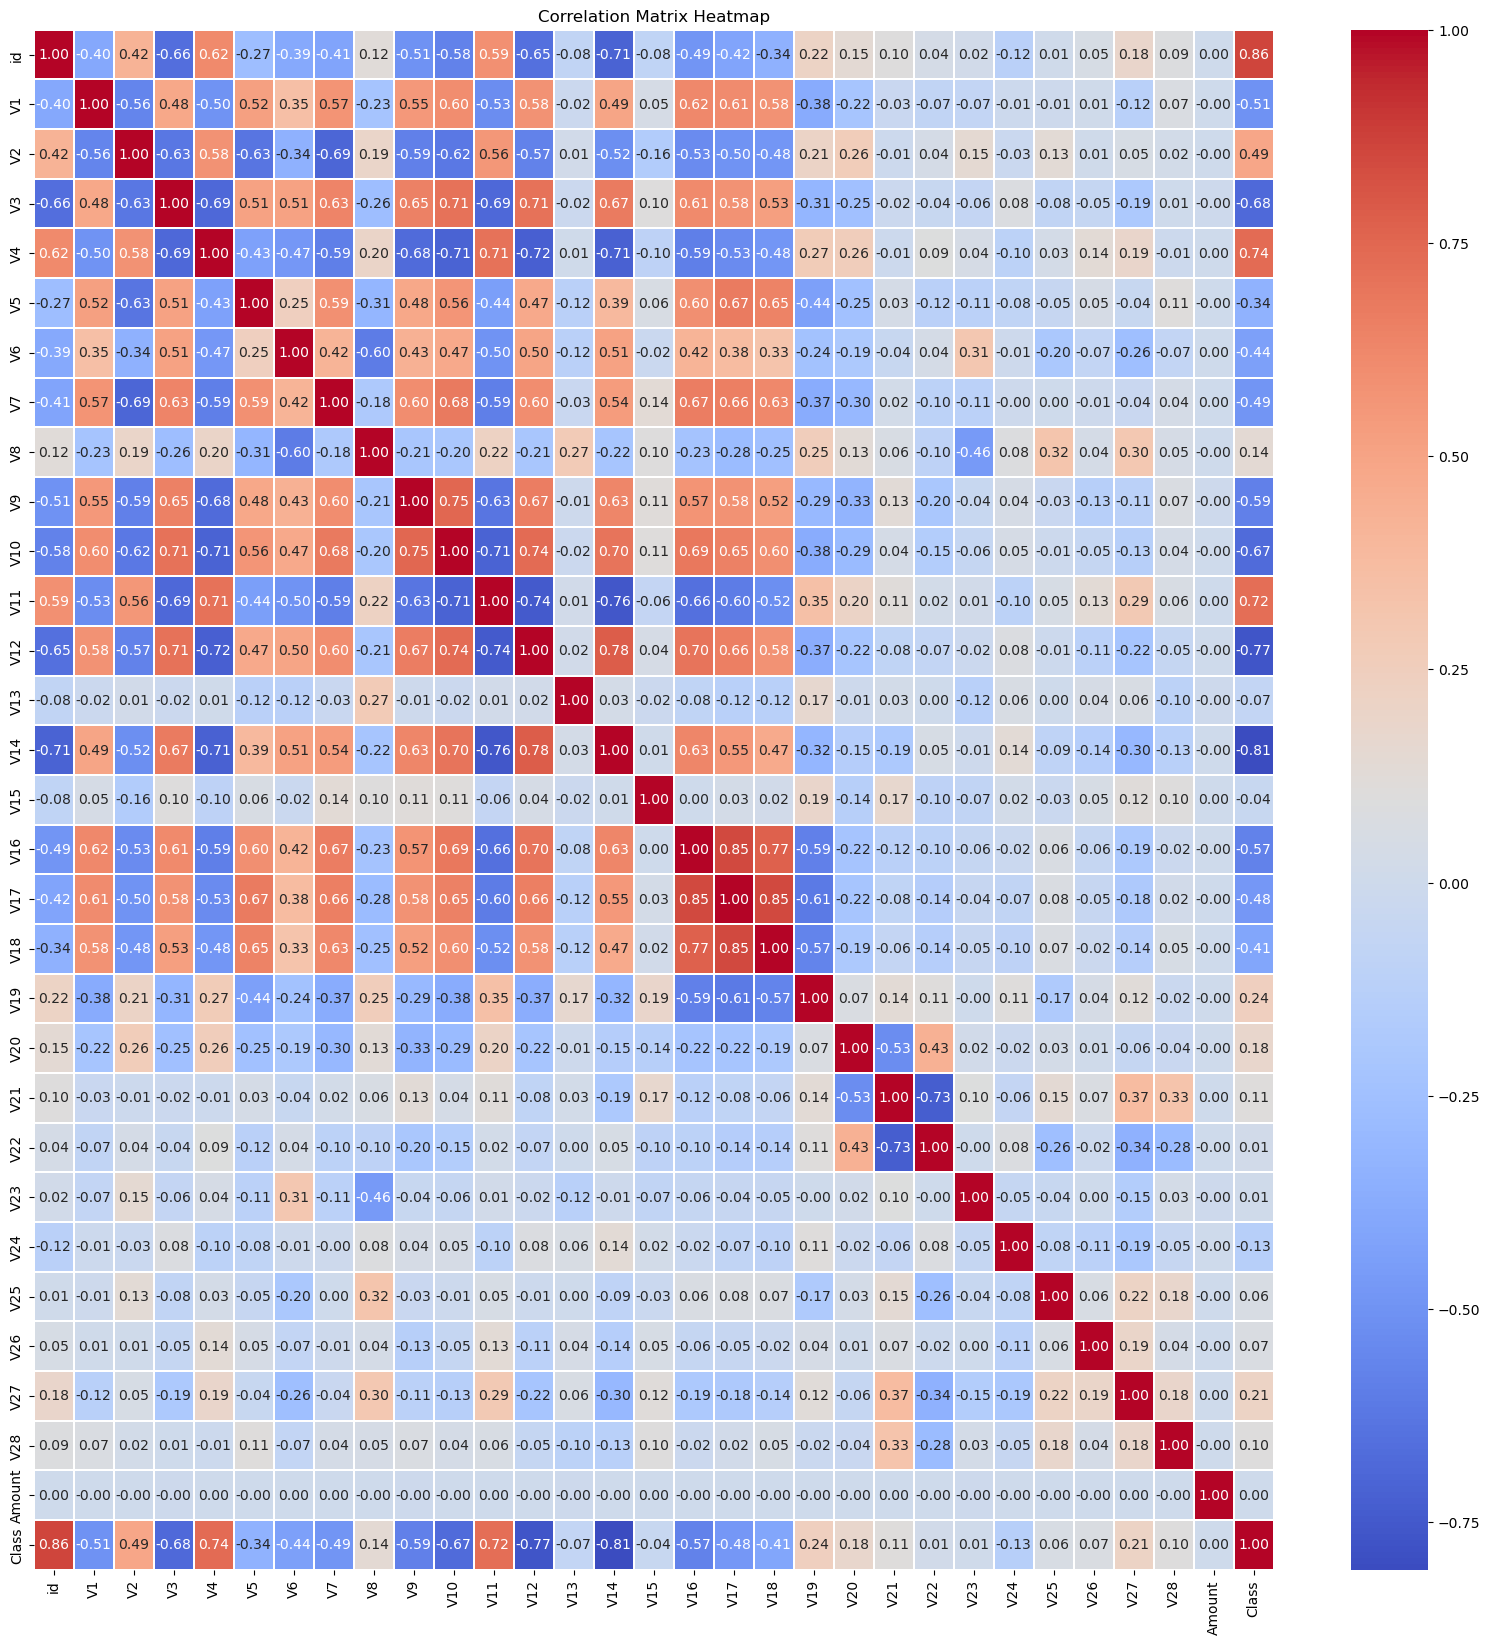

In [17]:
plt.figure(figsize=(20, 20))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### From the above heatmap we can see that the features 'V2', 'V4' and 'V11' have the highest correlation with the target 'Class'
##### We can disregard the rest of the features and build our model based features with the highest correlation

### Selecting the features and target

In [32]:
x = dataset.iloc[:,[2,4,11]].values
y = dataset.iloc[:,-1:].values

In [38]:
print(x)
print(y)
y = y.reshape(-1)

[[-0.46964845 -0.08372391 -0.98702001]
 [-0.35604509 -0.4296539   0.14010733]
 [-0.94938461 -0.45798629 -0.27298493]
 ...
 [-0.00409479 -0.03589304  0.4775816 ]
 [-0.51696952 -0.14447996 -0.32493409]
 [ 0.43323608  0.37473206  0.89213592]]
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### Scaling the data set

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Creating Multiple Models, To find the model which has the highest accuracy

### Splitting the data set into training and test sets

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Logistic Model creation and Model fitting

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

### Decision Tree Model Creation and Model fitting

In [42]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth = 3)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Random Forest Model creation and fitting

In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 100)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

### Predicting the result using Logistic Regression

In [45]:
logistic_prediction = logistic_model.predict(x_test)

### Predicting the result using Decision tree model

In [46]:
decision_tree_prediction = decision_tree_model.predict(x_test)

### Predicting the result using Random Forest models

In [47]:
random_forest_prediction = random_forest_model.predict(x_test)

### confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix
logistic_cm = confusion_matrix(y_test,logistic_prediction)
print(logistic_cm)

[[53227  3497]
 [ 5341 51661]]


In [49]:
decision_tree_cm = confusion_matrix(y_test,decision_tree_prediction)
print(decision_tree_cm)

[[53365  3359]
 [ 5293 51709]]


In [50]:
random_forest_cm = confusion_matrix(y_test, random_forest_prediction)
print(random_forest_cm)

[[55524  1200]
 [ 1269 55733]]


### Classification Report for Logistic Regression

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     56724
           1       0.94      0.91      0.92     57002

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



### Classification Report for Decision Tree Classifier

In [53]:
print(classification_report(y_test,decision_tree_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     56724
           1       0.94      0.91      0.92     57002

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



### Classification report for Random Forest

In [54]:
print(classification_report(y_test,random_forest_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     56724
           1       0.98      0.98      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [56]:
importance_random_forest = random_forest_model.feature_importances_
print(importance_random_forest)

[0.24479597 0.37118587 0.38401816]


### Visualising the Decision Tree

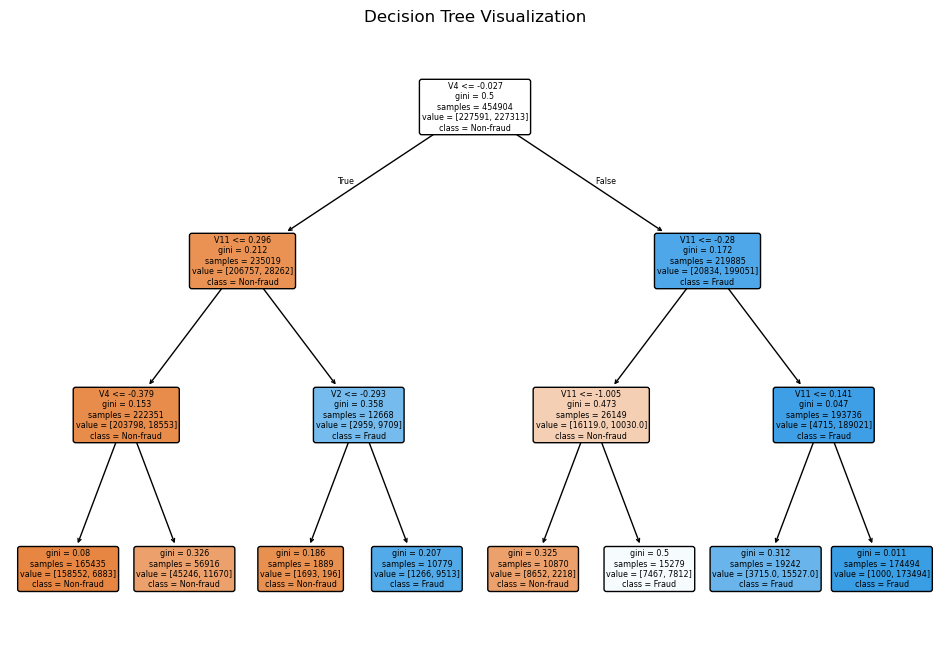

In [64]:
from sklearn.tree import plot_tree
feature_names = ['V2','V4','V11']
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=["Non-fraud", "Fraud"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

### Visualising a single tree from Random Forest

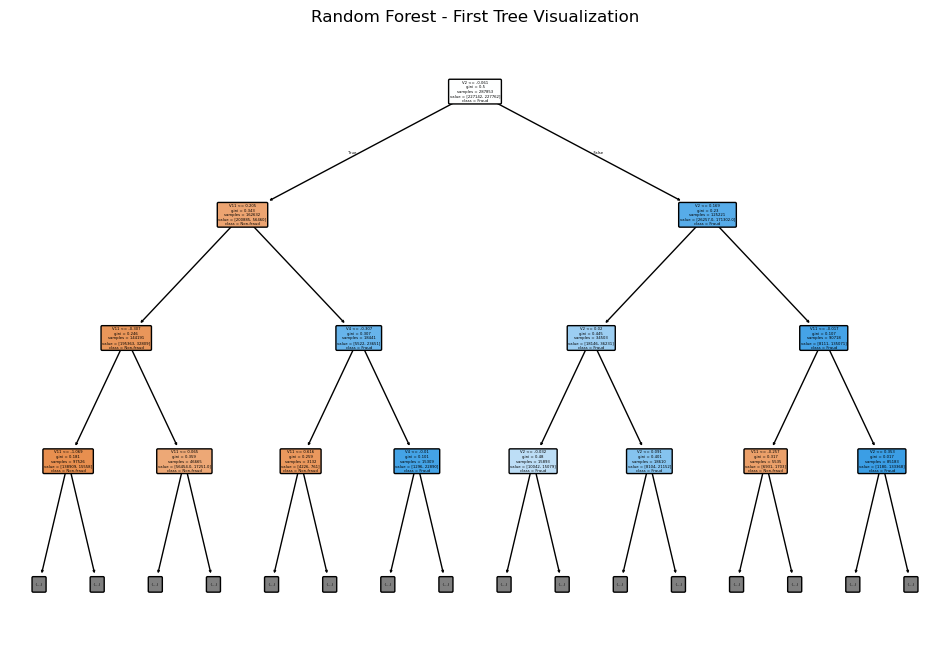

In [66]:
plt.figure(figsize=(12, 8))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=feature_names, class_names=["Non-fraud", "Fraud"], rounded=True,max_depth = 3)
plt.title("Random Forest - First Tree Visualization")
plt.show()

### Comparing the Accuracy of Models by Visualising

In [68]:
log_report = classification_report(y_test,logistic_prediction,output_dict = True)
dt_report = classification_report(y_test,decision_tree_prediction,output_dict= True)
rf_report = classification_report(y_test,random_forest_prediction,output_dict= True)

In [71]:
log_reg_acc = log_report['accuracy']
dt_acc = dt_report['accuracy']
rf_acc = rf_report['accuracy']

In [74]:
model_acc_score = {
    'Logistic Regression' : log_reg_acc,
    'Decision Tree' :  dt_acc,
    'Random Forest' : rf_acc
}

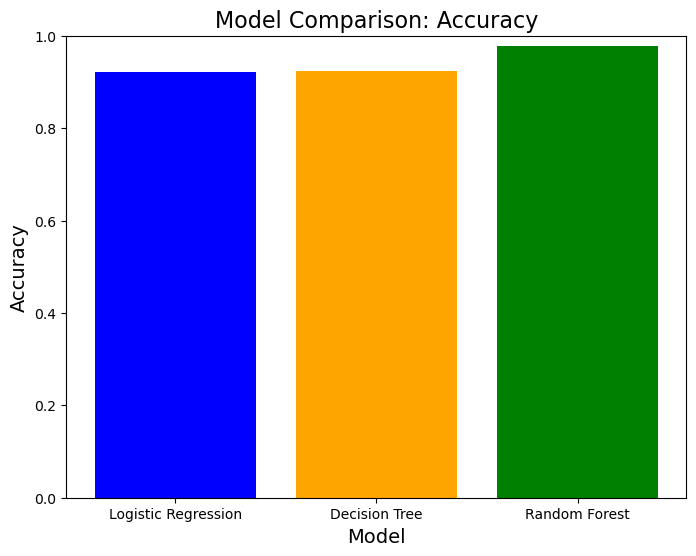

In [75]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_acc_score.keys(), model_acc_score.values(), color=['blue', 'orange', 'green'])

# Customize the plot
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)  # Or 'Accuracy' if using accuracy
plt.ylim([0, 1])

# Show the plot
plt.show()

#### We can conlcude that the Random Forest Algorithm has the best Accuracy and classifies most accurately